In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from tqdm import tqdm

In [13]:
# unnormalized real distribution : N(z|-1, 1) * 0.2 + N(z|3, 1) * 0.3
# normalizing constant Z will be 0.2 + 0.3 = 0.5 
def p_tilde(z):
    return norm.pdf(z + 1) * 0.2 + norm.pdf(z - 3) * 0.3

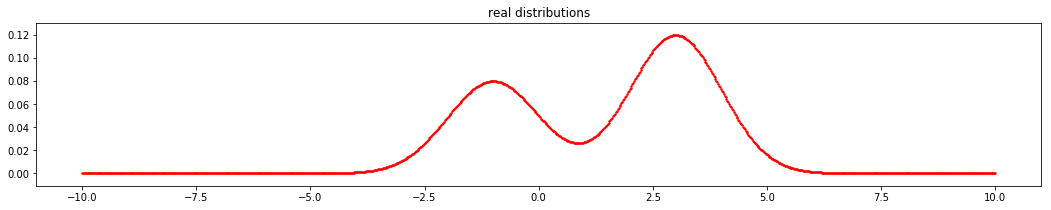

In [14]:
Z = np.linspace(-10, 10, 1000)
p_Z = p_tilde(Z)


plt.figure(figsize=[18, 3])

plt.title('real distributions')
plt.scatter(Z, p_Z, s=2, color='red')
plt.show()

In [15]:
# The number of samples
N = 100000

# q(z_new|z_current) = N(z_current, 1)
def sample_from_q(z_current):
    return norm.rvs(size=1)[0] + z_current

def q(x, mu):
    return norm.pdf(x - mu)

z_list = [0]
for _ in range(N):
    z_current = z_list[-1]
    z_new = sample_from_q(z_current)
    probability_to_accept = p_tilde(z_new) * q(z_current, z_new) / p_tilde(z_current) * q(z_new, z_current)
    probability_to_accept = min(1, probability_to_accept)
    
    # accept
    if probability_to_accept > np.random.uniform(size=1)[0]:
        z_list.append(z_new)
    
    # reject
    else:
        pass

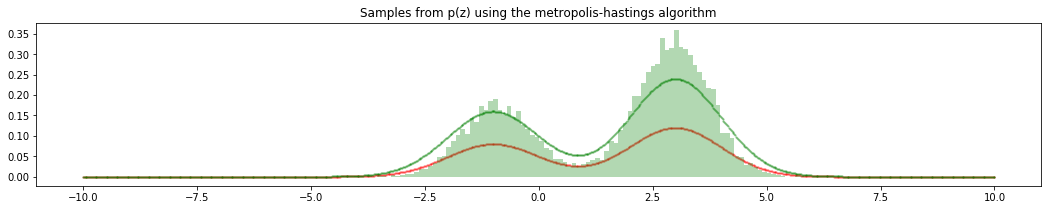

In [16]:
plt.figure(figsize=[18, 3])
plt.title('Samples from p(z) using the metropolis-hastings algorithm')
plt.scatter(Z, p_Z, s=2, alpha=0.3, color='red')
plt.scatter(Z, p_Z / 0.5, s=2, alpha=0.3, color='green')
plt.hist(z_list, bins=100, density=True, alpha=0.3, color='green')
plt.show()
    